# Facciola Titanic Machine Learning Model

## Loading the Data into DataFrame

In [19]:
import pandas as pd
import numpy as np
import os

train_df = pd.read_csv(os.path.join(os.getcwd(), 'data', 'train.csv'))
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Data Info

| Variable |	Definition |	Key |
| :---------:| :--------------:|:------: |
| survival |	Survival |	0 = No, 1 = Yes |
| pclass	| Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex	| Sex	| male or female |
| Age |	Age in years | int	 |
| sibsp |	# of siblings / spouses aboard the Titanic | int |	
| parch |	# of parents / children aboard the Titanic | int	 |
| ticket |	Ticket number	| str |
| fare |	Passenger fare | float	 |
| cabin	| Cabin number	| str |
| embarked	| Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

In [20]:
test_df = pd.read_csv(os.path.join(os.getcwd(), 'data', 'test.csv'))
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## EDA

- Inspecting the data structure and summary statistics.
- Visualizing survival counts based on different features (class, sex, age, etc.) using Seaborn.

In [21]:
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

### Visualize the data

#### First glance takeaways
- in general a higher percentage of died rather than lived
- your chances of survival increased if you were upper or second class, in fact more people in upper class lived rather than died
- those who were really young seem to live at higher rates and those who were very old seem to die at higher rates. Age distribution appears slighlty left skewed towards survival
- having only 1-2 parents/or children and 1-2 siblings/spouses was the best odds for survival. Too few or too many causes issues

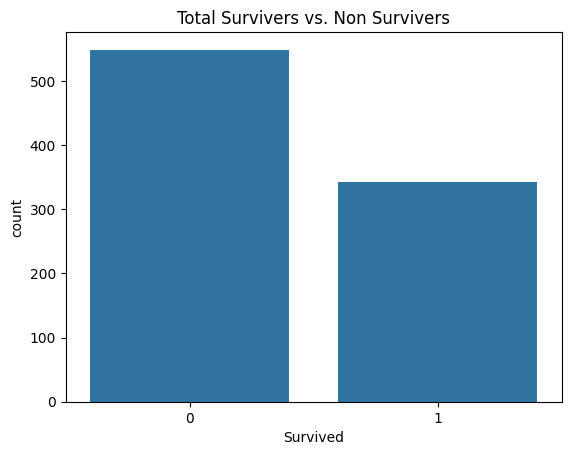

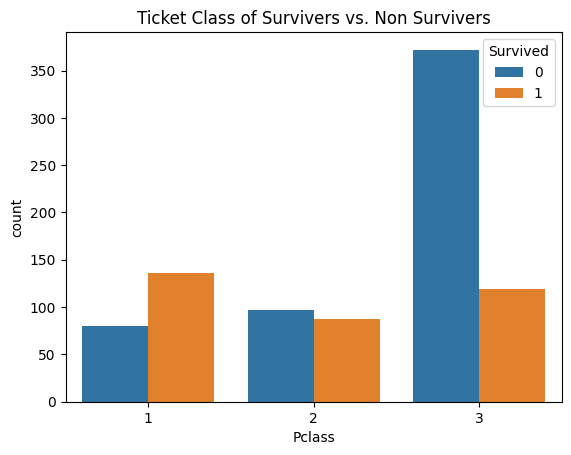

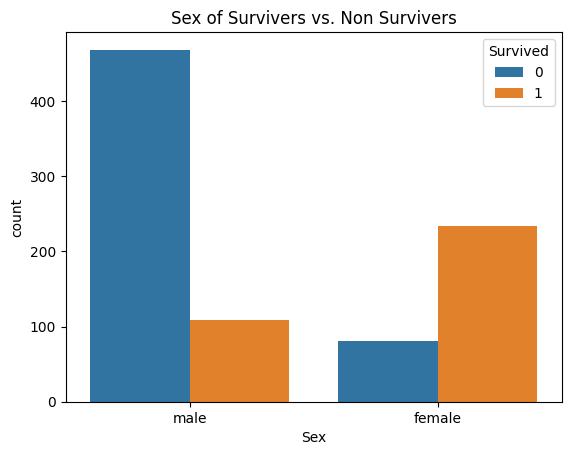

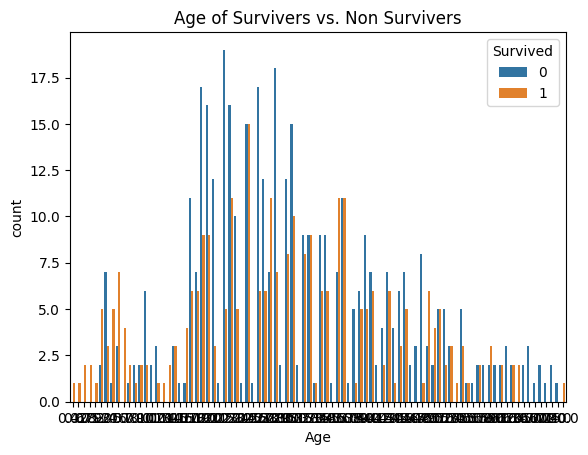

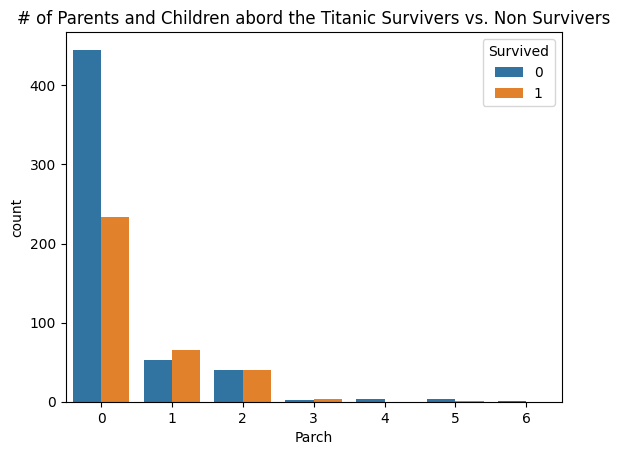

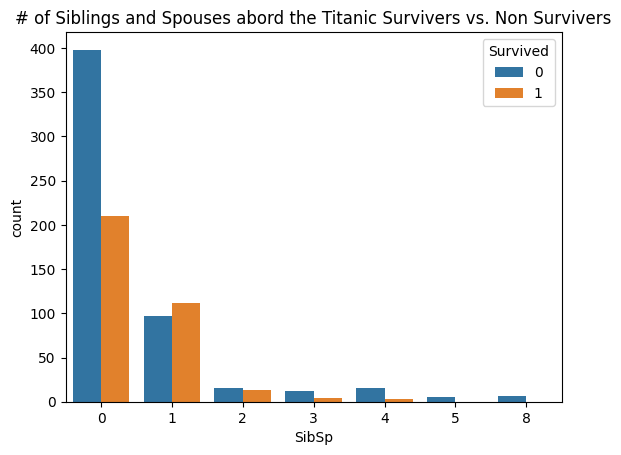

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Survived', data=train_df)
plt.title('Total Survivers vs. Non Survivers')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Ticket Class of Survivers vs. Non Survivers')
plt.show()

sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Sex of Survivers vs. Non Survivers')
plt.show()

sns.countplot(x='Age', hue='Survived', data=train_df)
plt.title('Age of Survivers vs. Non Survivers')
plt.show()

sns.countplot(x='Parch', hue='Survived', data=train_df)
plt.title('# of Parents and Children abord the Titanic Survivers vs. Non Survivers')
plt.show()

sns.countplot(x='SibSp', hue='Survived', data=train_df)
plt.title('# of Siblings and Spouses abord the Titanic Survivers vs. Non Survivers')
plt.show()

# Data Preprocessing
- check for missing values in the dataset
- impute missing values
- feature engineering

### Check for missing values

In [23]:
#Find missing values
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Imputing missing values

- for age we need to check distribution shape. If we are normally distributed we can use the mean, otherwise we use the median.
- let's plot age in a histogram then run statistical test to check the shape of distribution

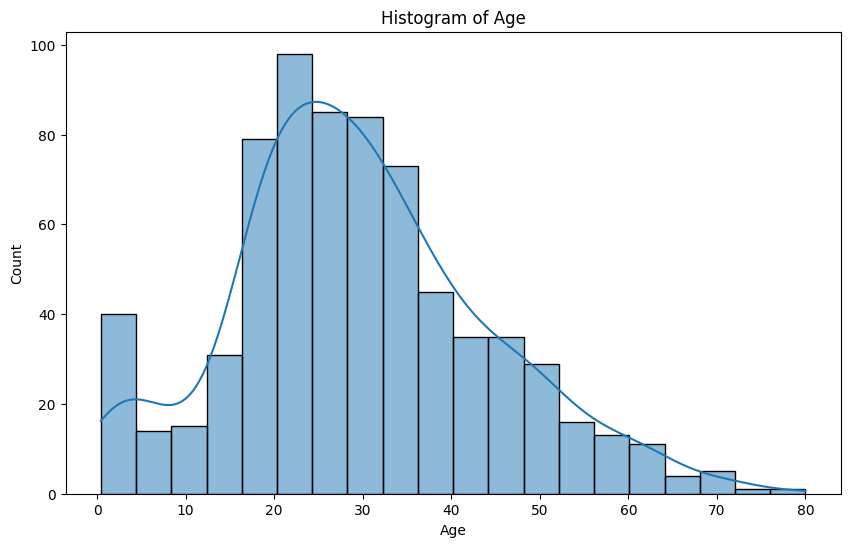

Shapiro-Wilk Test: Statistic=0.9814577414504954, p-value=7.337348958673592e-08
Kolmogorov-Smirnov Test: Statistic=0.06456656793494475, p-value=0.004958146899084227
Anderson-Darling Test: Statistic=3.8230373853616584, Critical Values=[0.573 0.652 0.783 0.913 1.086], Significance Levels=[15.  10.   5.   2.5  1. ]


In [24]:
from scipy.stats import shapiro, kstest, anderson

cleaned_age = train_df['Age'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(cleaned_age, kde=True)
plt.title('Histogram of Age')
plt.show()

# Shapiro-Wilk Test
shapiro_test = shapiro(cleaned_age)
print(f'Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# Kolmogorov-Smirnov Test
kstest_test = kstest(cleaned_age, 'norm', args=(cleaned_age.mean(), cleaned_age.std()))
print(f'Kolmogorov-Smirnov Test: Statistic={kstest_test.statistic}, p-value={kstest_test.pvalue}')

# Anderson-Darling Test
anderson_test = anderson(cleaned_age, dist='norm')
print(f'Anderson-Darling Test: Statistic={anderson_test.statistic}, Critical Values={anderson_test.critical_values}, Significance Levels={anderson_test.significance_level}')


- Given that all 3 test seem to agree that the data is not normally distributed it makes the most sense to impute the age using the **median**

In [25]:
median_age = train_df['Age'].median()
print(f"Median age is {median_age}\n")

train_df['Age'] = train_df['Age'].apply(lambda x: median_age if pd.isna(x) else x)

#Verify values
print(train_df['Age'].sample(10))
print()
print(train_df.isnull().sum())

Median age is 28.0

126    28.0
49     18.0
605    36.0
248    37.0
373    22.0
343    25.0
58      5.0
725    20.0
811    39.0
182     9.0
Name: Age, dtype: float64

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


- Since so many cabin values are missing it would not be helpful to impute using the mode of the data
- Instead what we can do is change the cabin value to be a binary value 0 if the party did not have a cabin value and 1 if they did
- more likely than not this will not help our model but it is worth a try

In [26]:
# Check for missing values before transformation
print("Missing values before transformation:")
print(train_df['Cabin'].isnull().sum())

train_df['Cabin'] = train_df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

# Check the unique values after transformation
print("Unique values after transformation:")
print(train_df['Cabin'].unique())

# Verify the values
print("\nMissing values after transformation:")
print(train_df.isnull().sum())

Missing values before transformation:
687
Unique values after transformation:
[0 1]

Missing values after transformation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64


- For embarked it is string data so we can use the **mode** to impute 2 missing values

In [27]:
embarked_mode = train_df['Embarked'].mode()[0]
print(f"Mode of embarked is {embarked_mode}\n")

train_df['Embarked'] = train_df['Embarked'].apply(lambda x: embarked_mode if pd.isna(x) else x)

#Verify values
print(train_df['Embarked'].sample(10))
print()
print(train_df.isnull().sum())

Mode of embarked is S

741    S
848    S
769    S
553    C
400    S
722    S
878    S
857    S
379    S
73     C
Name: Embarked, dtype: object

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### Feature Engineering
We can create new features to improve our model from the features that we currently have.
- Famsize (combining 'SipSp' and 'Parch')
- Title (extract the title from name i.e. [ms. mrs. mr. sir etc])
- hasNickName (has a nickname denoted by quotes in the name column)
- isClergy (has the Rev. title in their name)
- isKnight (has the Sir. title in their name)
- isChild (Age is less than 18)
- isMarried (SibSp is at least 1, if female title is Mrs. If male, then must have matching female last name [we are assuming heterosexual marriages, the woman taking the mans surname, and in the case of man, that his wife is also on the titanic])

In [28]:
#Family size
train_df['FamSize'] = train_df['SibSp'] + train_df['Parch']
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize
870,871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,0,S,0
352,353,0,3,"Elias, Mr. Tannous",male,15.0,1,1,2695,7.2292,0,C,2
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,1,S,1
545,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,0,S,0
154,155,0,3,"Olsen, Mr. Ole Martin",male,28.0,0,0,Fa 265302,7.3125,0,S,0


In [29]:
#Title
train_df['Title'] = train_df['Name'].apply(lambda x: x.split(",")[1].split('.')[0].strip())
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize,Title
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,28.0,1,0,367230,15.5000,0,Q,1,Miss
738,739,0,3,"Ivanoff, Mr. Kanio",male,28.0,0,0,349201,7.8958,0,S,0,Mr
273,274,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.7000,1,C,1,Mr
225,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,0,S,0,Mr
159,160,0,3,"Sage, Master. Thomas Henry",male,28.0,8,2,CA. 2343,69.5500,0,S,10,Master


In [46]:
#has nickname
import re
pattern = r'"(.*?)"'

train_df['HasNickName'] = train_df['Name'].apply(lambda x: 0 if len(re.findall(pattern, x)) == 0 else 1)
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize,Title,HasNickName
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,0,S,0,Miss,1
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,1,S,0,Miss,0
552,553,0,3,"O'Brien, Mr. Timothy",male,28.0,0,0,330979,7.8292,0,Q,0,Mr,0
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,1,C,1,Mr,0
109,110,1,3,"Moran, Miss. Bertha",female,28.0,1,0,371110,24.1500,0,Q,1,Miss,0


In [47]:
#is clergy
train_df['IsClergy'] = train_df['Title'].apply(lambda x: 1 if x.lower() == 'rev' else 0)
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize,Title,HasNickName,IsClergy
537,538,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,0,C,0,Miss,0,0
463,464,0,2,"Milling, Mr. Jacob Christian",male,48.0,0,0,234360,13.0000,0,S,0,Mr,0,0
771,772,0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,0,S,0,Mr,0,0
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,1,S,1,Miss,0,0
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,0,S,0,Rev,0,1


In [48]:
#is knight
train_df['IsKnight'] = train_df['Title'].apply(lambda x: 1 if x.lower() == 'sir' else 0)
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize,Title,HasNickName,IsClergy,IsKnight
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,0,S,0,Rev,0,1,0
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,0,S,1,Mrs,0,0,0
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,0,C,0,Miss,0,0,0
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,0,S,0,Mrs,0,0,0
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,57.0000,1,S,1,Mr,0,0,0


In [51]:
#isChild
train_df['IsChild'] = train_df['Age'].apply(lambda x: 1 if x < 18 else 0)
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize,Title,HasNickName,IsClergy,IsKnight,IsChild
560,561,0,3,"Morrow, Mr. Thomas Rowan",male,28.0,0,0,372622,7.750,0,Q,0,Mr,0,0,0,0
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.125,0,Q,5,Master,0,0,0,1
115,116,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.925,0,S,0,Mr,0,0,0,0
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.050,0,S,0,Mr,0,0,0,0
209,210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.000,1,C,0,Mr,0,0,0,0


In [61]:
#isMarried

def is_married_man(row, married_women):
   surname = row['Name'].split(',')[0]
   if row['Sex'] == 'male' and row['SibSp'] >= 1 and surname in married_women:
      return 1
   return 0

#find married women first
train_df['isMarried'] = train_df.apply(lambda row: 1 if row['Sex'].lower() == 'female' and row['Title'].lower() == 'mrs' else 0, axis=1)

# Create a set of last names of married women
married_women_last_names = set(train_df[train_df['isMarried'] == 1]['Name'].apply(lambda name: name.split(',')[0]))

train_df['isMarried'] = train_df.apply(lambda row: is_married_man(row, married_women_last_names) if row['isMarried'] == 0 else row['isMarried'], axis=1)

train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize,Title,HasNickName,IsClergy,IsKnight,IsChild,isMarried
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,0,S,0,Mr,0,0,0,0,0
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,0,S,0,Mrs,0,0,0,0,1
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,28.0,0,0,330980,7.8792,0,Q,0,Miss,1,0,0,0,0
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,0,C,0,Mr,1,0,0,0,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,28.0,1,0,2689,14.4583,0,C,1,Mrs,0,0,0,0,1
